In [5]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view

##### Own functions
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert

from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

collision solver could not be imported You may need to install CGAL and re-install tyssue


C++ extension are not available for this version


/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

Topology changed!
Topology changed!
Topology changed!
Topology changed!


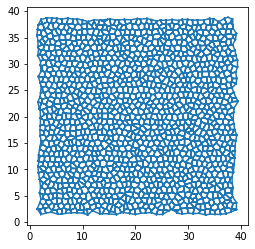

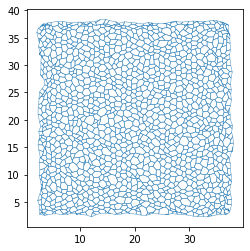

In [6]:
#### Initialize Model
[cellmap_init, geom, energyContributions_model] = vertexModel.initialize()

## Update mechanical parameters
cellmap_init = inputMechanicalParameters.update(cellmap_init)

## Initial stage
energyContributions_model.compute_energy(cellmap_init)

## RUN
[cellmap_H, geom, model_H, history_H] = vertexModel.solveEuler(cellmap_init, geom, energyContributions_model, endTime = 100)


fig, ax = sheet_view(cellmap_H, ['y', 'x'], edge={"color":1, 'colormap': 'Greys'})
#auxFunctions.create_frames(history_H, './results', edge={'color':'black'})
#auxFunctions.exportToMesh(history_H, './results')

import warnings
warnings.filterwarnings("ignore")

In [7]:
cellmap_H.edge_df

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,...,uy,rx,ry,sub_area,is_active,length_elasticity,prefered_length,uz,length_elasticity_ECM,length_elasticity_FRC
edge,,,,,,,,,,,,,,,,,,,,,
0,4,-0.015071,0.366761,1384,3,-0.135795,0.340696,37.398622,36.865392,37.262828,...,0.928931,-0.100925,0.142230,-0.007535,1,70.335100,0.357821,0.57735,26.765370,43.569729
1,26,0.223899,0.717008,1383,25,0.615803,-0.367270,36.150723,37.070862,36.766525,...,-0.512226,-0.841592,0.138344,0.111949,1,76.347353,0.733636,0.57735,28.975589,47.371764
2,25,0.023800,0.717008,1382,26,-0.615803,0.367270,36.766525,36.703592,36.150723,...,0.512226,0.760348,-0.414829,0.011900,1,76.347353,0.758168,0.57735,28.975589,47.371764
3,27,0.085076,0.674855,1345,26,-0.586486,0.333861,36.766525,36.703592,36.180040,...,0.494716,-0.049009,0.172959,0.042538,1,77.364458,0.771564,0.57735,25.902150,51.462308
4,26,-0.010559,0.674855,1382,27,0.586486,-0.333861,36.180040,37.037453,36.766525,...,-0.494716,0.173862,-0.080968,-0.005280,1,77.364458,0.547326,0.57735,25.902150,51.462308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,1591,0.194212,0.517025,1372,2768,0.289205,-0.428574,25.556842,37.182167,25.846047,...,-0.828923,-0.508510,0.082024,0.097106,1,72.616672,0.530774,0.57735,20.141611,52.475061
8154,2769,0.744908,1.118912,860,841,0.143725,-1.109643,2.645474,25.506647,2.789199,...,-0.991716,-0.690507,0.148261,0.372454,1,70.308701,0.788502,0.57735,26.218579,44.090122
8155,2770,0.067616,0.383351,784,396,0.297434,0.241849,2.678878,22.606080,2.976312,...,0.630881,-0.254523,-0.434289,0.033808,1,76.260818,0.524380,0.57735,26.650323,49.610495


In [9]:
from tabulate import tabulate

# Create an empty list to store the data
table_data = []

for edge_idx, edge in cellmap_H.edge_df.iterrows():
    # Find the opposite edge indices
    opposite_edge_indices = cellmap_H.edge_df[
        (cellmap_H.edge_df["srce"] == edge["trgt"]) &
        (cellmap_H.edge_df["trgt"] == edge["srce"])
    ].index

    # Add the data to the table
    table_data.append([f"Edge {edge_idx}", edge['length_elasticity']])
    
    for opp_idx in opposite_edge_indices:
        table_data.append([f"Opposite Edge {opp_idx}", cellmap_H.edge_df.at[opp_idx, 'length_elasticity']])

        if cellmap_H.edge_df.loc[edge_idx, 'length_elasticity'] != cellmap_H.edge_df.loc[opp_idx, 'length_elasticity']:
            print("Length elasticities don't match")
            print(edge_idx)
            print(opp_idx)

# Print the table
print(tabulate(table_data, headers=["Edge", "Length Elasticity"]))


Length elasticities don't match
8148
8149
Length elasticities don't match
8149
8148
Length elasticities don't match
8150
8151
Length elasticities don't match
8151
8150
Length elasticities don't match
8152
8153
Length elasticities don't match
8153
8152
Length elasticities don't match
8155
8156
Length elasticities don't match
8156
8155
Edge                  Length Elasticity
------------------  -------------------
Edge 0                          70.3351
Edge 1                          76.3474
Opposite Edge 2                 76.3474
Edge 2                          76.3474
Opposite Edge 1                 76.3474
Edge 3                          77.3645
Opposite Edge 4                 77.3645
Edge 4                          77.3645
Opposite Edge 3                 77.3645
Edge 5                          72.9976
Opposite Edge 6                 72.9976
Edge 6                          72.9976
Opposite Edge 5                 72.9976
Edge 7                          76.7969
Opposite Edge 8         

In [ ]:
sheet, new_edges_indices, new_opp_edges_indices, new_vertices_indices = ln_divide_FRCs(cellmap_H, "prefered_length", 5)

Chosen edge: 2587
New vert: 2762
New Edge: 8131
New opposite edge: 8132
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 8108
New vert: 2763
New Edge: 8133
New opposite edge: 8134
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 1866
New vert: 2764
New Edge: 8135
New opposite edge: 8136
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 4529
New vert: 2765
New Edge: 8137
New opposite edge: 8138
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 7333
New vert: 2766
New Edge: 8139
New opposite edge: 8140
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 5570
New vert: 2767
New Edge: 8140
New opposite edge: 8141
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology c

Topology changed!
Topology changed!
Topology changed!
Chosen edge: 3572
New vert: 2796
New Edge: 8195
New opposite edge: 8196
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 4279
New vert: 2797
New Edge: 8197
New opposite edge: 8198
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 3716
New vert: 2798
New Edge: 8199
New opposite edge: 8200
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 2588
New vert: 2799
New Edge: 8201
New opposite edge: 8202
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 1296
New vert: 2800
New Edge: 8204
New opposite edge: 8205
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 2915
New vert: 2801
New Edge: 8206
New opposite edge: 8207
Topology c

Topology changed!
Topology changed!
Chosen edge: 6889
New vert: 2838
New Edge: 8277
New opposite edge: 8278
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 1528
New vert: 2839
New Edge: 8279
New opposite edge: 8280
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 5266
New vert: 2840
New Edge: 8282
New opposite edge: 8283
Chosen edge: 6226
New vert: 2841
New Edge: 8284
New opposite edge: 8285
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 4519
New vert: 2842
New Edge: 8286
New opposite edge: 8287
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 1050
New vert: 2843
New Edge: 8289
New opposite edge: 8290
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 6650
New vert: 2844
New Edge: 8291
New opposite edge: 8292
Topology changed!
Topology c

Topology changed!
Topology changed!
Topology changed!
Chosen edge: 5062
New vert: 2900
New Edge: 8404
New opposite edge: 8405
Topology changed!
Topology changed!
Chosen edge: 2582
New vert: 2901
New Edge: 8406
New opposite edge: 8407
Topology changed!
Chosen edge: 6059
New vert: 2901
New Edge: 8404
New opposite edge: 8405
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 1153
New vert: 2902
New Edge: 8406
New opposite edge: 8407
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 1541
New vert: 2903
New Edge: 8408
New opposite edge: 8409
Topology changed!
Topology changed!
Chosen edge: 7446
New vert: 2904
New Edge: 8410
New opposite edge: 8411
Topology changed!
Chosen edge: 2244
New vert: 2905
New Edge: 8412
New opposite edge: 8413
Topology changed!
Topology changed!
Topology changed!
Topology changed!
Chosen edge: 2093
New vert: 2905
New Edge: 841

In [ ]:
cellmap_H.edge_df